In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
files.upload()

Saving ETH_Price.csv to ETH_Price.csv


{'ETH_Price.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2022-08-17,1877.934326,1951.675659,1823.532227,1832.999634,1832.999634,20308508124\n2022-08-18,1833.715576,1876.376953,1826.957764,1847.007813,1847.007813,14999352229\n2022-08-19,1847.095337,1847.095337,1611.338867,1612.987305,1612.987305,25906358731\n2022-08-20,1612.650635,1652.218750,1534.298828,1577.003784,1577.003784,18334580263\n2022-08-21,1576.543579,1640.936523,1569.046509,1619.318970,1619.318970,15849221752\n2022-08-22,1619.166870,1622.778809,1535.014771,1622.505859,1622.505859,18557078599\n2022-08-23,1622.939331,1666.676514,1569.428589,1662.769897,1662.769897,18322041914\n2022-08-24,1662.695435,1686.557739,1610.099243,1657.059204,1657.059204,16780932907\n2022-08-25,1657.336548,1718.183228,1656.856079,1696.457031,1696.457031,14818795695\n2022-08-26,1696.324585,1698.561035,1498.771240,1507.782837,1507.782837,26713710143\n2022-08-27,1508.156982,1517.150024,1454.282959,1491.395020,1491.395020,18120831899\n2022-08-28,14

In [4]:
df = pd.read_csv('ETH_Price.csv')
#set the date as the index
df = df.set_index( pd.DatetimeIndex(df ['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2022-08-17,2022-08-17,1877.934326,1951.675659,1823.532227,1832.999634,1832.999634,20308508124
2022-08-18,2022-08-18,1833.715576,1876.376953,1826.957764,1847.007813,1847.007813,14999352229
2022-08-19,2022-08-19,1847.095337,1847.095337,1611.338867,1612.987305,1612.987305,25906358731
2022-08-20,2022-08-20,1612.650635,1652.218750,1534.298828,1577.003784,1577.003784,18334580263
2022-08-21,2022-08-21,1576.543579,1640.936523,1569.046509,1619.318970,1619.318970,15849221752
...,...,...,...,...,...,...,...
2023-08-13,2023-08-13,1849.053833,1859.916382,1834.804321,1839.280151,1839.280151,3054625661
2023-08-14,2023-08-14,1839.323486,1853.836304,1834.800415,1844.185791,1844.185791,4083364724
2023-08-15,2023-08-15,1844.164185,1845.547607,1816.325073,1826.932739,1826.932739,4483923893
2023-08-16,2023-08-16,1827.036377,1829.361206,1798.966675,1805.659058,1805.659058,4976573383


In [6]:
future_days = 5

In [7]:
#Create a new column[df]
df[str(future_days)+ '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
#Show the data
df[['Close', str(future_days)+ '_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2022-08-17,1832.999634,1622.505859
2022-08-18,1847.007813,1662.769897
2022-08-19,1612.987305,1657.059204
2022-08-20,1577.003784,1696.457031
2022-08-21,1619.318970,1507.782837
...,...,...
2023-08-13,1839.280151,NaN
2023-08-14,1844.185791,NaN
2023-08-15,1826.932739,NaN
2023-08-16,1805.659058,NaN


In [8]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[1832.999634]
 [1847.007813]
 [1612.987305]
 [1577.003784]
 [1619.31897 ]
 [1622.505859]
 [1662.769897]
 [1657.059204]
 [1696.457031]
 [1507.782837]
 [1491.39502 ]
 [1430.547363]
 [1553.037354]
 [1523.838867]
 [1553.684937]
 [1586.176758]
 [1577.220459]
 [1556.872681]
 [1577.641602]
 [1617.183228]
 [1561.748535]
 [1629.906372]
 [1635.347656]
 [1719.085449]
 [1776.203735]
 [1761.800049]
 [1713.765259]
 [1580.787964]
 [1634.755005]
 [1471.693481]
 [1432.447754]
 [1469.741699]
 [1335.329102]
 [1377.541382]
 [1324.388184]
 [1252.607788]
 [1327.680176]
 [1328.259521]
 [1317.993286]
 [1294.216797]
 [1335.32019 ]
 [1330.127686]
 [1337.410889]
 [1335.652344]
 [1327.978638]
 [1311.644409]
 [1276.093506]
 [1323.439209]
 [1362.126587]
 [1352.837158]
 [1351.709473]
 [1332.516968]
 [1315.500488]
 [1322.604248]
 [1291.337646]
 [1279.575684]
 [1294.906372]
 [1288.123901]
 [1297.422119]
 [1274.871704]
 [1306.296631]
 [1331.713623]
 [1310.447021]
 [1285.744263]
 [1283.200928]
 [1299.946411]
 [1314.299

In [9]:
y = np.array(df[str(future_days)+ '_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[1622.505859 1662.769897 1657.059204 1696.457031 1507.782837 1491.39502
 1430.547363 1553.037354 1523.838867 1553.684937 1586.176758 1577.220459
 1556.872681 1577.641602 1617.183228 1561.748535 1629.906372 1635.347656
 1719.085449 1776.203735 1761.800049 1713.765259 1580.787964 1634.755005
 1471.693481 1432.447754 1469.741699 1335.329102 1377.541382 1324.388184
 1252.607788 1327.680176 1328.259521 1317.993286 1294.216797 1335.32019
 1330.127686 1337.410889 1335.652344 1327.978638 1311.644409 1276.093506
 1323.439209 1362.126587 1352.837158 1351.709473 1332.516968 1315.500488
 1322.604248 1291.337646 1279.575684 1294.906372 1288.123901 1297.422119
 1274.871704 1306.296631 1331.713623 1310.447021 1285.744263 1283.200928
 1299.946411 1314.299194 1363.447021 1344.998535 1461.665405 1566.56665
 1514.374878 1555.477905 1619.698486 1590.783325 1572.714478 1579.70459
 1519.711792 1531.541748 1645.093384 1627.968018 1572.234741 1568.591309
 1332.835571 1100.1698   1299.4646   1287.221069 1255.2

In [12]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [14]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma =0.00001)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [16]:
svr_rbf_confidence = svr_rbf.score(X_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.8566418470323243


In [18]:
svm_prediction = svr_rbf.predict(X_test)
print(svm_prediction)

[1770.10093973 1719.81099403 1201.48701696 1884.00968329 1874.19986796
 1873.61698446 1201.88270712 1204.27217781 1644.89818577 1628.51878372
 1257.52173746 1572.81935259 1830.83309837 1598.0660593  1693.70797082
 1574.31659361 1581.7272747  1592.1602165  1646.16519225 1740.49940279
 1889.99532268 1869.98504832 1856.74385865 1857.9724383  1560.16343215
 1868.7300363  1249.54827915 1726.79370163 1877.74143294 1874.8441284
 1603.19142073 1887.55436845 1268.40909118 1297.9287007  1832.51994361
 1319.03329515 1883.32885403 1877.01570396 1558.4005595  1607.63678526
 1627.23646809 1352.86513207 1622.12685186 1774.87569969 1341.83984257
 1206.74992003 1797.24244118 1587.59910421 1728.57108738 1570.03720913
 1820.99999026 1328.91306979 1583.03047613 1261.29970322 1629.28284646
 1257.55904443 1879.18208978 1888.16134187 1882.82967344 1573.32152673
 1615.46068354 1204.92097859 1880.66362584 1326.976886   1254.97884389
 1889.04664093 1874.38456191 1241.68454379 1609.50188568 1787.72301245
 1279.7

In [19]:
print(y_test)

[1795.70813  1876.059692 1220.159424 1827.971191 1827.462036 1873.076416
 1218.182129 1295.688599 1761.659668 1650.716797 1217.703613 1667.059204
 1805.953735 1603.105957 1634.755005 1627.968018 1647.319336 1776.203735
 1608.373169 1793.001831 1865.539551 1860.357178 1805.659058 1800.500977
 1568.591309 1939.347046 1266.384155 1727.204102 1923.681885 1892.189697
 1377.541382 1849.042725 1283.200928 1259.676758 1909.114014 1167.609863
 1859.432861 1995.060913 1579.70459  1569.167603 1567.398682 1276.093506
 1640.817139 1471.693481 1315.500488 1276.273926 1871.005127 1663.433716
 1792.737183 1646.15564  1752.384766 1288.123901 1641.792725 1387.932739
 1792.119995 1266.353882 1849.999878 1832.395996 1937.438354 1534.088257
 1737.659424 1269.379028 1753.415283 1514.374878 1417.938477 1864.912354
 1911.646118 1335.32019  1634.326416 1752.0448   1461.665405 1580.787964
 1294.303345]


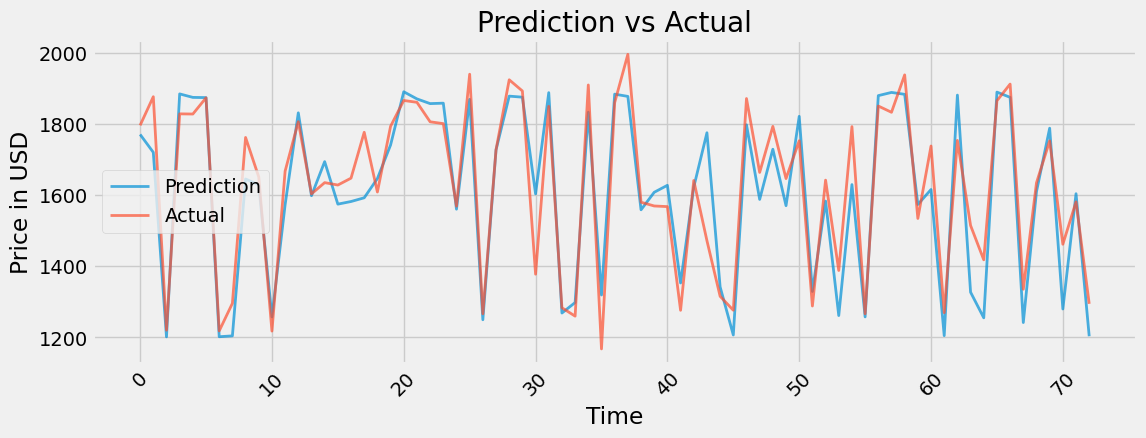

In [22]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()